In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [2]:
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=0)

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "y": y})
circles.head()

,X1,X2,y
0,0.511095,-0.027159,1
1,-0.074573,-0.448138,1
2,-0.812506,-0.624244,0
3,0.347187,0.311210,1
4,-0.294257,0.410657,1


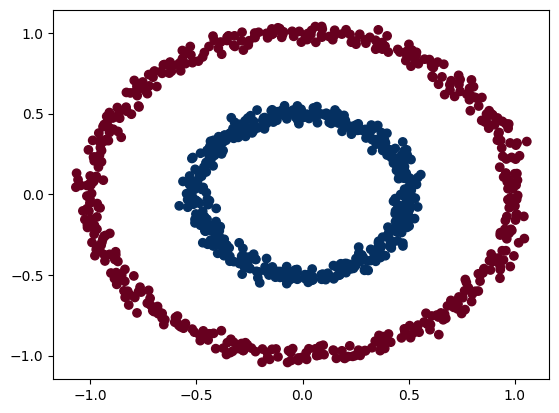

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [4]:
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(2, 10),
    # nn.Sigmoid(),
    nn.ReLU(),
    nn.Linear(10, 10),
    # nn.Sigmoid(),
    nn.ReLU(),
    nn.Linear(10,1),
).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optim_fn = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
X = torch.from_numpy(X).type(torch.float32).to(device)
y = torch.from_numpy(y).type(torch.float32).to(device)

X[:5], y[:5]

(tensor([[ 0.5111, -0.0272],
         [-0.0746, -0.4481],
         [-0.8125, -0.6242],
         [ 0.3472,  0.3112],
         [-0.2943,  0.4107]]),
 tensor([1., 1., 0., 1., 1.]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train.device

device(type='cpu')

In [7]:


epochs = 200
epoch_list = []
train_loss_list = []
test_loss_list = []


torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):

    model.train()
    y_logits_train = model(X_train).squeeze()
    y_pred_train = torch.round(torch.sigmoid(y_logits_train))
    # y_pred_train = torch.round(y_logits_train)


    loss = loss_fn(y_logits_train, y_train)

    optim_fn.zero_grad

    loss.backward()
    
    optim_fn.step()


    model.eval()
    with torch.inference_mode():
        y_logits_test = model(X_test).squeeze()
        y_pred_tets = torch.round(torch.sigmoid(y_logits_test))
        # y_pred_tets = torch.round(y_logits_test)

        test_loss = loss_fn(y_logits_test, y_test)


    if epoch % 10 == 0:
        epoch_list.append(epoch)
        train_loss_list.append(loss.item())
        test_loss_list.append(test_loss.item())

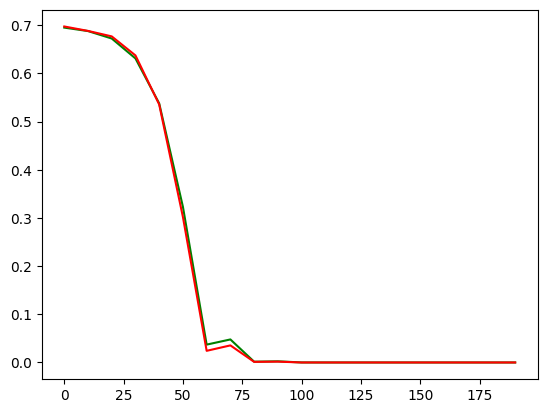

In [8]:
plt.plot(epoch_list, train_loss_list, "g")
plt.plot(epoch_list, test_loss_list, "r")



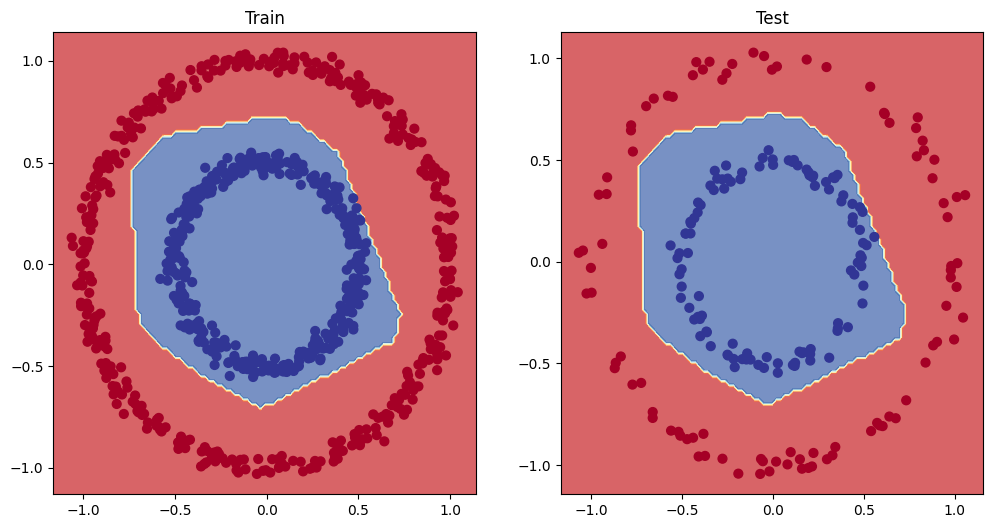

In [9]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [10]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)